# Image classification using neural network - MNIST

The MNIST (Modified National Institute of Standards and Technology database) dataset is a large dataset of handwritten digits commonly used in the field of machine learning. It consists of 60,000 training images and 10,000 test images. The images in the set are 28x28 pixels. A full description of the dataset can be found [here](https://en.wikipedia.org/wiki/MNIST_database).

The main purpose of this notebook is:
- illustrate the use of a neural network for an image classification task.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import numpy as np

*1. What is the KERAS library for? Research it and try to understand why it is necessary. If we don't want to use this library, what are the alternatives?*

ANSWER:

## Loading training and test sets

In [ ]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print(x_train.shape)
print(x_test.shape)
print(np.max(x_train), np.min(x_train))
#print(x_train[0,:,5:20])
print(y_train[0:5])

(60000, 28, 28)
(10000, 28, 28)
255 0
[5 0 4 1 9]


## Showing the training set

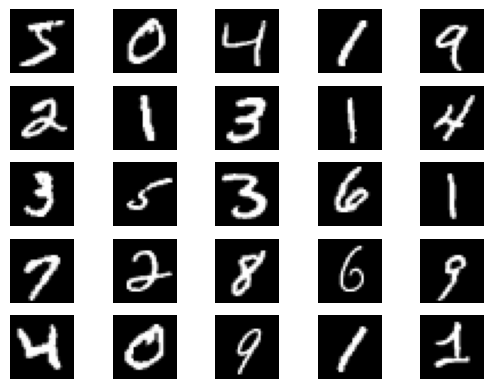

In [ ]:
#Displaying a few samples of the training set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Showing the testing set

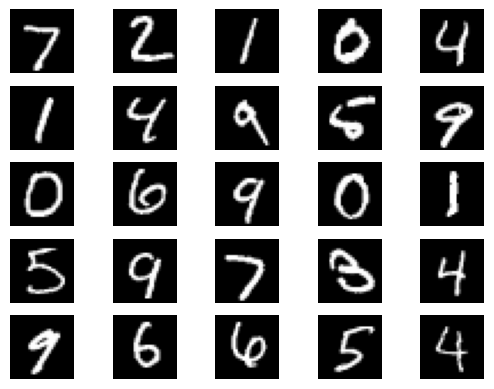

In [ ]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Normalizing data

In [ ]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 20

#Normalizing data between 0 and 1
x_train = x_train.reshape(60000, 784) #784 = 28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[0:5])


(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


*2(a). In the code snippet identified above "normalizing data between 0 and 1" what is the reshape function doing?*

ANSWER:

*2(b). What does the piece of code identified as "One hot encoding" do? Explain what it is for and what it modifies in the original data y_train and y_test.*

ANSWER:

## Defining the model

In [ ]:
#Defining the Neural Network architecture
def my_model():
    inputs = Input(shape=(784,))
    out1 = Dense(512, activation='relu')(inputs)
    out2 = Dropout(0.2)(out1)
    out3 = Dense(512, activation='relu')(out2)
    out4 = Dropout(0.2)(out3)
    out5 = Dense(10, activation='softmax')(out4)
    model = Model(inputs=inputs, outputs=out5)
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

*3. What type of model (network) is being built above: conventional neural network or convolutional neural network? How did you arrive at this conclusion? How many layers does it have and what is each of them for?*

ANSWER:

## Summary of model 

In [ ]:
#Building the model and showing a summary
model = my_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable

# Training the model

In [ ]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)
epochs = 20
#Training the model
history_model = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

Epoch 1/20
375/375 [==============================] - 8s 22ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0961 - val_accuracy: 0.9768
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.1125 - val_accuracy: 0.9753
Epoch 3/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0941 - val_accuracy: 0.9787
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0984 - val_accuracy: 0.9801
Epoch 5/20
375/375 [==============================] - 8s 22ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.1055 - val_accuracy: 0.9805
Epoch 6/20
375/375 [==============================] - 9s 23ms/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 0.1178 - val_accuracy: 0.9786
Epoch 7/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.1114 - val_accuracy: 0.9806

*4. It is essential that we use a training and validation set during training. Here, we are passing as input to the model.fit function only the training set, x_train. Is this right?*

ANSWER:

## Training and validation curves

In [ ]:
history_model.history

{'loss': [0.05010738596320152,
  0.044669993221759796,
  0.037051375955343246,
  0.03218422830104828,
  0.030587630346417427,
  0.026468228548765182,
  0.02512613870203495,
  0.02219931222498417,
  0.020645929500460625,
  0.021800758317112923,
  0.018204759806394577,
  0.018922904506325722,
  0.018125327304005623,
  0.01373895350843668,
  0.01528745237737894,
  0.01450269017368555,
  0.015373324044048786,
  0.013910510577261448,
  0.013719137758016586,
  0.013648773543536663],
 'accuracy': [0.984541654586792,
  0.9862291812896729,
  0.9884166717529297,
  0.9897500276565552,
  0.9909999966621399,
  0.9926458597183228,
  0.9927916526794434,
  0.9929375052452087,
  0.9935208559036255,
  0.9935833215713501,
  0.9946666955947876,
  0.9947500228881836,
  0.9948958158493042,
  0.9958541393280029,
  0.9956458210945129,
  0.9956458210945129,
  0.9957916736602783,
  0.9959791898727417,
  0.9959791898727417,
  0.9965000152587891],
 'val_loss': [0.09607181698083878,
  0.11245276778936386,
  0.0941

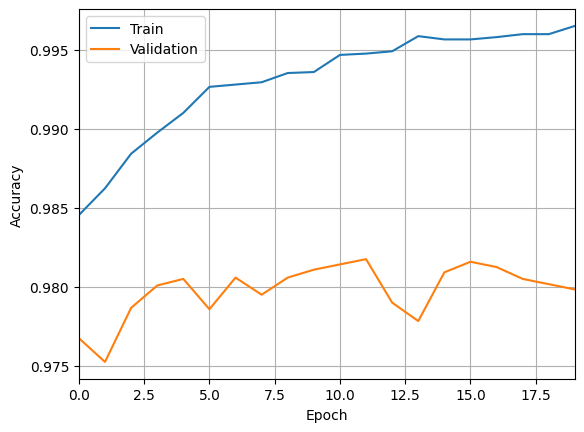

In [ ]:
#Plot accuracy history
plt.plot(history_model.history['accuracy'], label = "Train")
plt.plot(history_model.history['val_accuracy'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

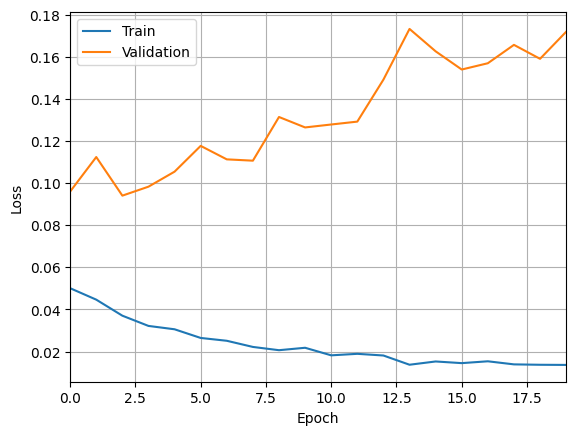

In [ ]:
#Plot accuracy history
plt.plot(history_model.history['loss'], label = "Train")
plt.plot(history_model.history['val_loss'],label = "Validation")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

## Loading the best model and evaluating on the test set

In [ ]:
#Load the best_model during training
best_model = my_model()
best_model.load_weights('mnist_keras.model')

#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %f' %score[0])
print('Test accuracy: %f' %score[1])

Test loss: 0.080779
Test accuracy: 0.975900


## Showing some prediction errors

313/313 [==============================] - 2s 6ms/step


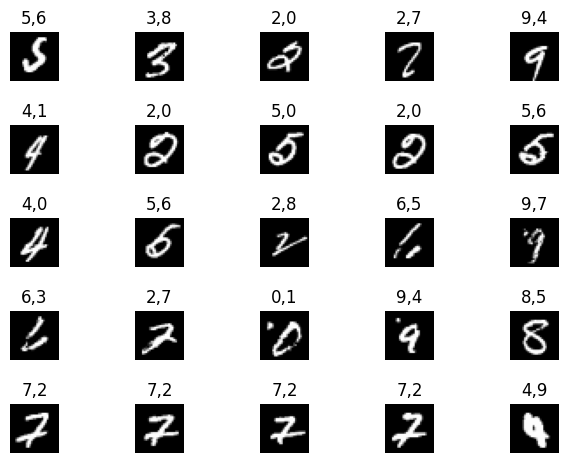

In [ ]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

## Showing weights as images

(784, 512)


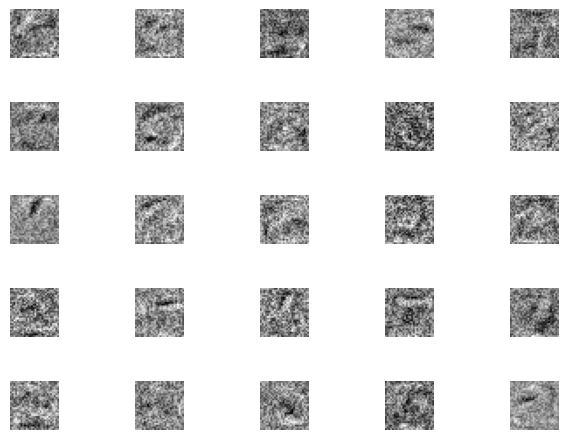

In [ ]:
weights, biases = best_model.layers[1].get_weights()
print(weights.shape)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(weights[:,-counter].reshape(28,28), cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Activity suggestion (optional)

- Try to improve the model output on the test set by increasing the number of training epochs. Use the Colab GPU and monitor the loss curve to ensure there is no overfitting.

# References

- [MNIST Database](https://en.wikipedia.org/wiki/MNIST_database).